In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
train_data = pd.read_csv("train.csv")
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [3]:
test_data = pd.read_csv("test.csv")
test_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,2820,15000,2.0,0,0,4,9,2820,0,1985,0,98052,47.7255,-122.101,2440,15000
5400,3856903515,20141222T000000,3,2.00,1460,6250,1.5,0,0,4,7,1460,0,1912,0,98103,47.6693,-122.333,1690,4750
5401,2557000400,20150409T000000,3,2.50,2070,9900,1.0,0,0,3,8,1420,650,1979,0,98023,47.2988,-122.371,2070,8250
5402,4386700135,20141114T000000,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


create id lat long csv file for getting image for advance model

In [4]:
train_coord_df = train_data[['id', 'lat', 'long']]
test_coord_df = test_data[["id","lat","long"]]
train_coord_df.to_csv("train_coord.csv", index=False)
test_coord_df.to_csv("test_coord.csv", index=False)
print(train_coord_df.head())
print()
print(test_coord_df.head())

           id      lat     long
0  9117000170  47.4362 -122.187
1  6700390210  47.4034 -122.187
2  7212660540  47.2704 -122.313
3  8562780200  47.5321 -122.073
4  7760400350  47.3715 -122.074

           id      lat     long
0  2591820310  47.4388 -122.162
1  7974200820  47.6784 -122.285
2  7701450110  47.5646 -122.129
3  9522300010  47.6995 -122.228
4  9510861140  47.6647 -122.083


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

only date is object rest all numerical 

In [5]:
train_data["date"].nunique()

366

In [6]:
train_data["date"]

0        20150505T000000
1        20140708T000000
2        20150115T000000
3        20150427T000000
4        20141205T000000
              ...       
16204    20141113T000000
16205    20141111T000000
16206    20140930T000000
16207    20140620T000000
16208    20150325T000000
Name: date, Length: 16209, dtype: object

In [7]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data["date"] = pd.to_datetime(test_data["date"])

In [8]:
# Extracting Year
train_data['year'] = train_data['date'].dt.year
test_data['year'] = test_data['date'].dt.year
# Extracting Month
train_data['month'] = train_data['date'].dt.month
test_data['month'] = test_data['date'].dt.month

# Extracting Day
train_data['day'] = train_data['date'].dt.day
test_data['day'] = test_data['date'].dt.day

# You can even extract the day of the week (0=Monday, 6=Sunday)
train_data['day_of_week'] = train_data['date'].dt.dayofweek
test_data['day_of_week'] = test_data['date'].dt.dayofweek

In [9]:
train_data.drop(columns=["id","date"], inplace=True)
test_data.drop(columns=["id","date"], inplace=True)

In [10]:
train_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
day_of_week      0
dtype: int64

In [11]:
test_data.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
day_of_week      0
dtype: int64

In [12]:
train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
count,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,...,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,...,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707,2014.321982,6.581159,15.656055,2.007465
std,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,...,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012,0.467250,3.113352,8.647084,1.458248
min,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000,2014.000000,4.000000,8.000000,1.000000
50%,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,2.000000
75%,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000,2015.000000,9.000000,23.000000,3.000000
max,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,6.000000


In [13]:
train_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [14]:
train_data["yr_renovated"].unique()

array([   0, 1997, 2014, 1987, 1992, 1979, 1994, 1963, 2013, 1983, 1995,
       2005, 1969, 1986, 2002, 2003, 1968, 1989, 1996, 2000, 2004, 2011,
       1982, 2006, 1993, 2010, 1998, 2007, 2008, 1980, 2015, 1955, 1991,
       2001, 1973, 1940, 1970, 1990, 1971, 1977, 2012, 1985, 1988, 1957,
       2009, 1981, 1999, 1976, 1960, 1967, 1962, 1958, 1978, 1946, 1984,
       1945, 1975, 1974, 1944, 1972, 1959, 1964, 1965, 1950, 1934, 1951,
       1948, 1954, 1956])

In [15]:
cat_cols = ["bedrooms","bathrooms","floors","waterfront","view","grade","condition","year","month","day_of_week"]

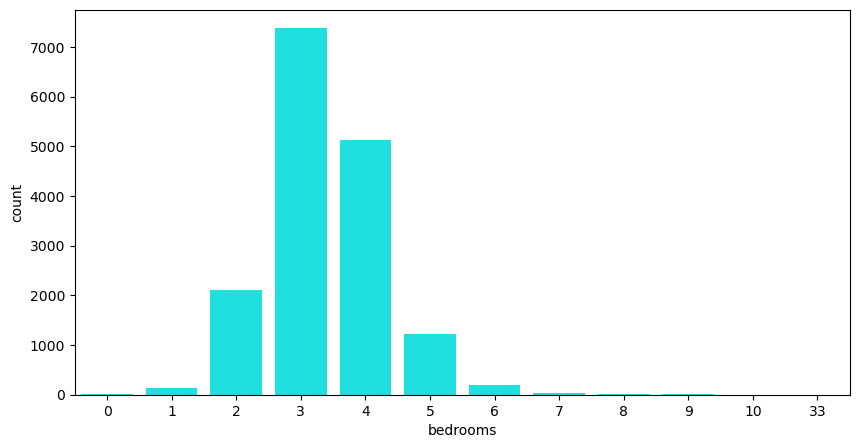

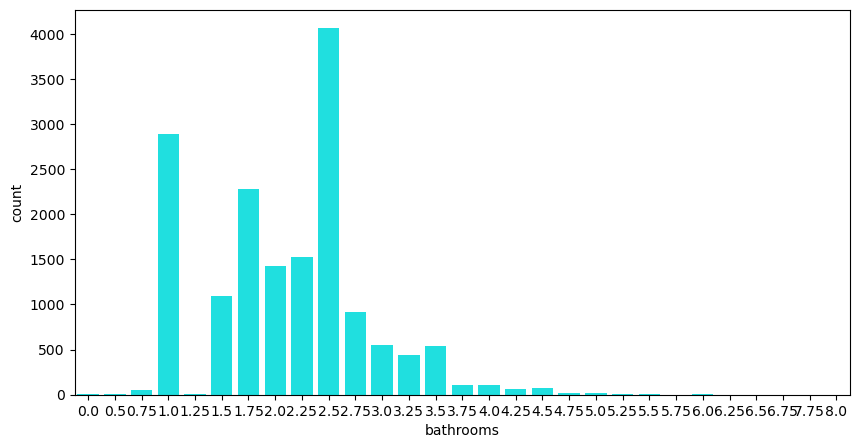

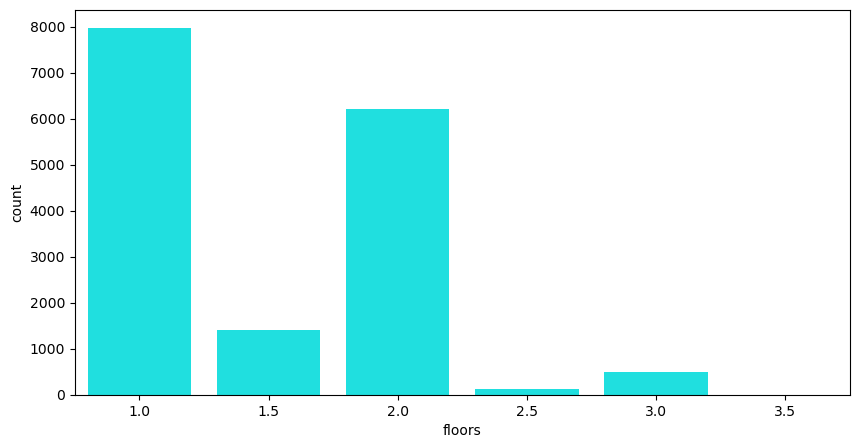

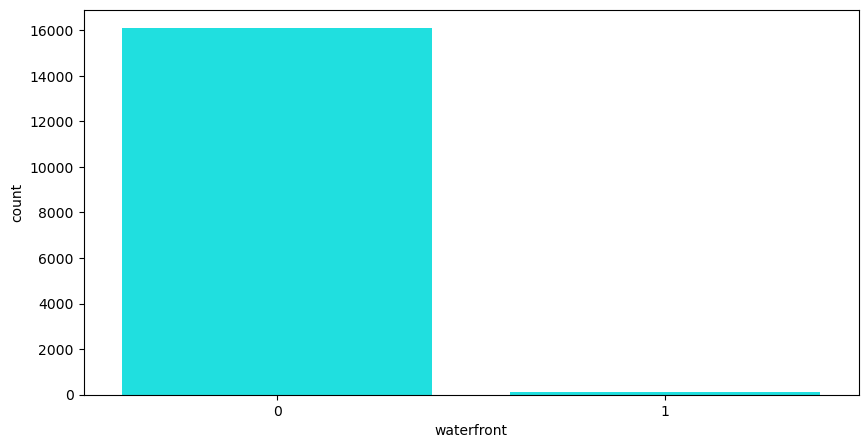

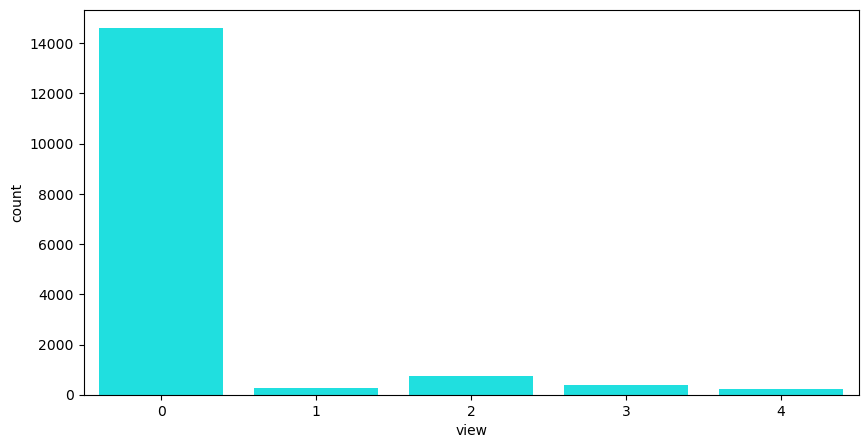

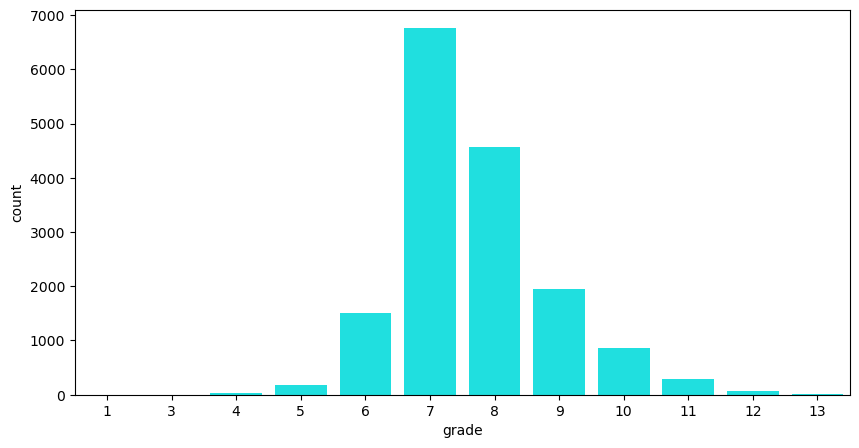

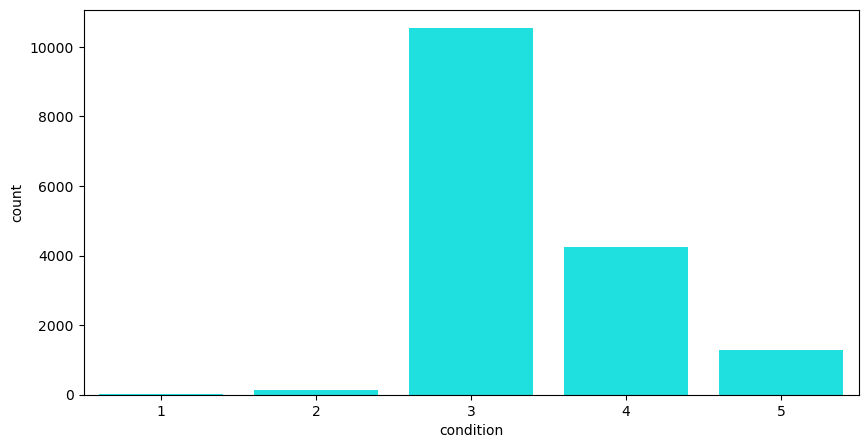

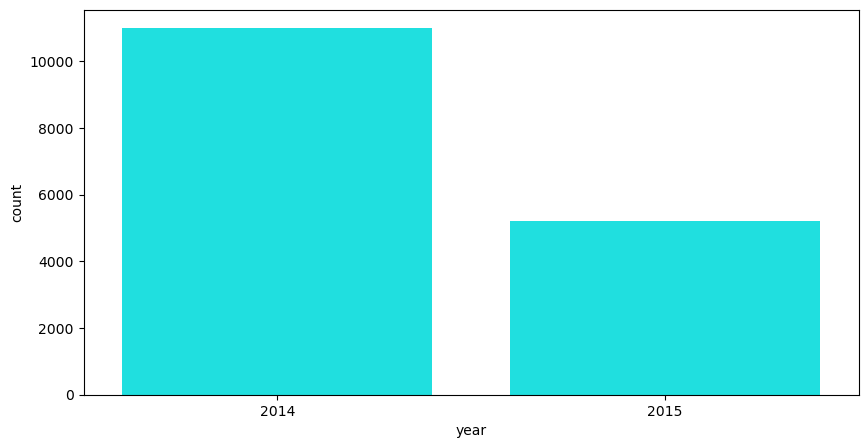

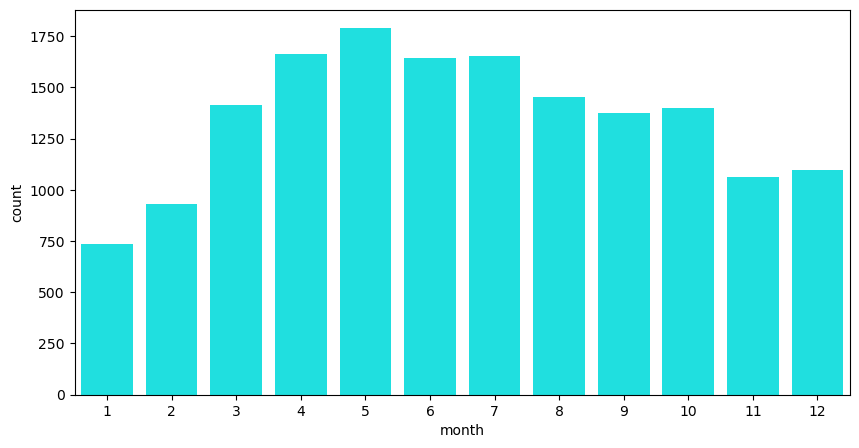

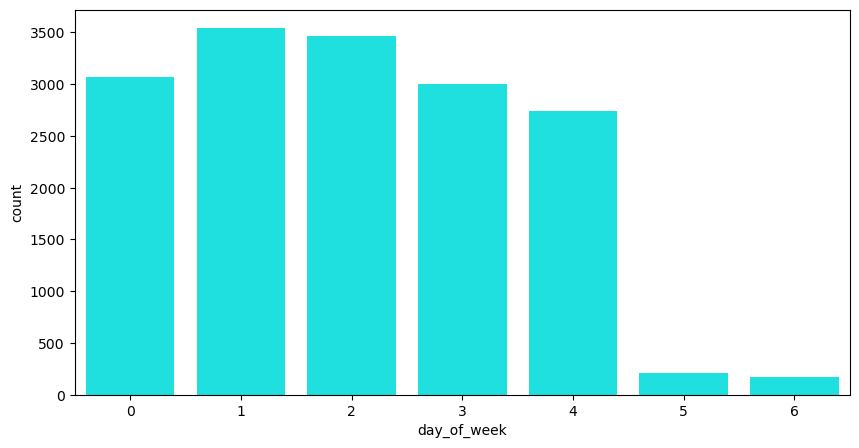

In [16]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=train_data, x=col,color="cyan")
    plt.show()

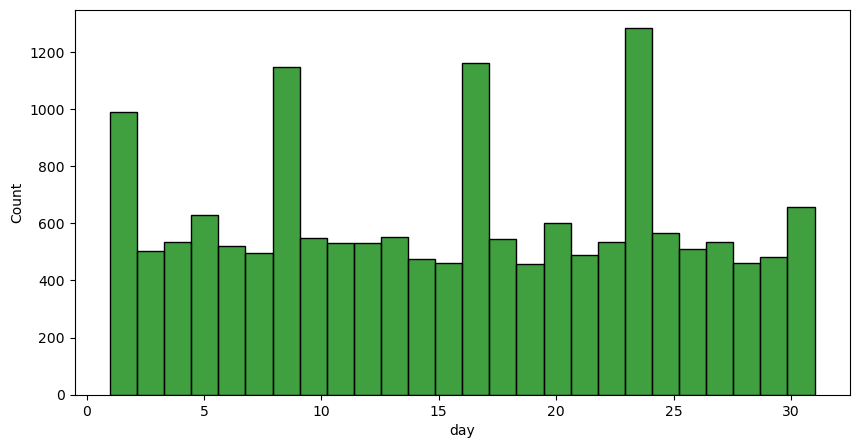

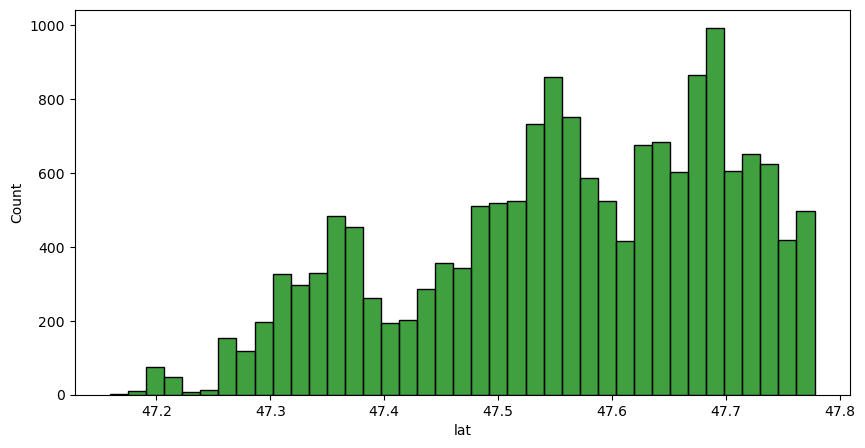

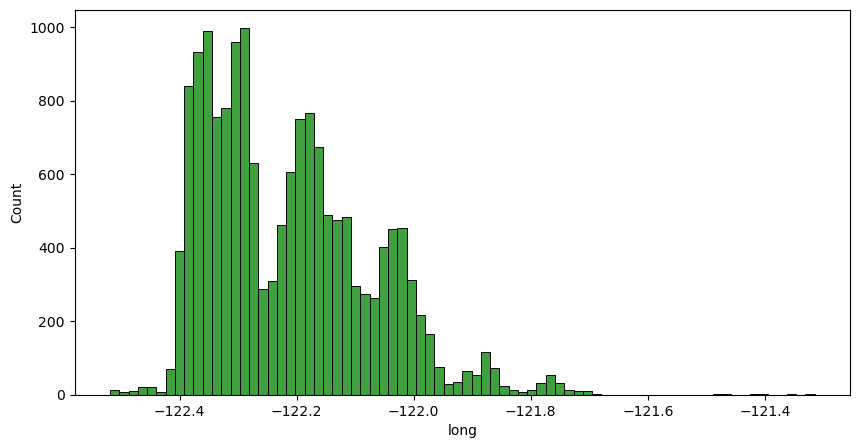

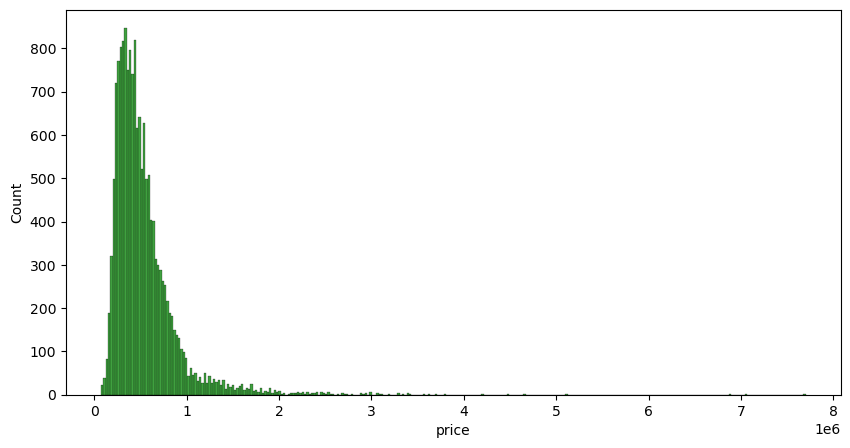

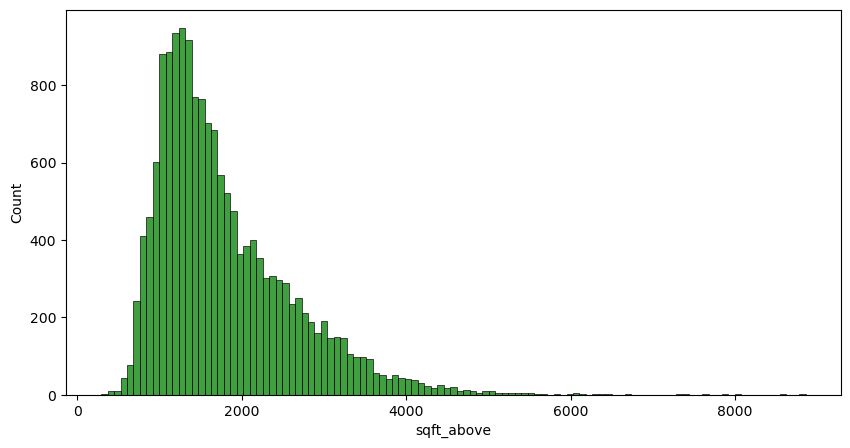

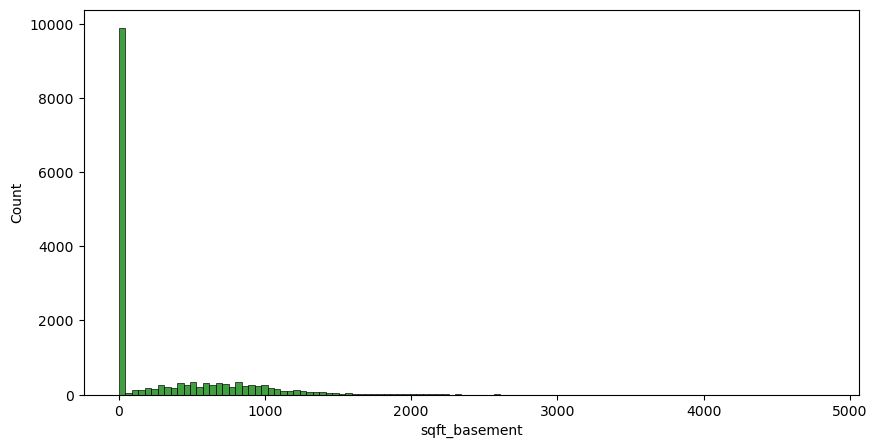

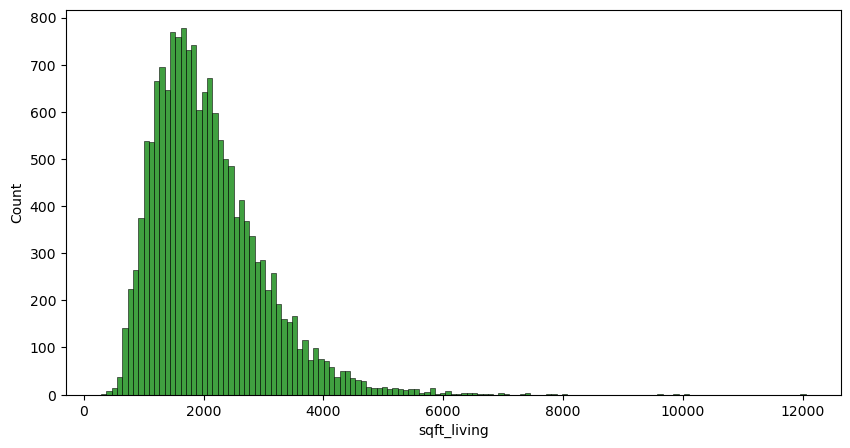

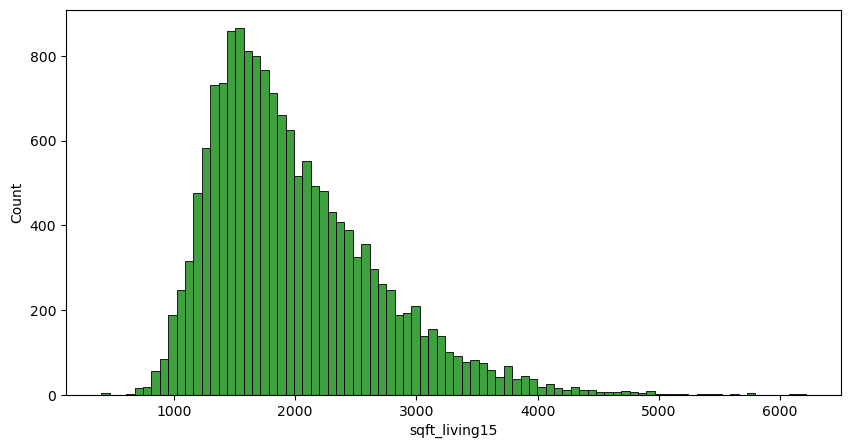

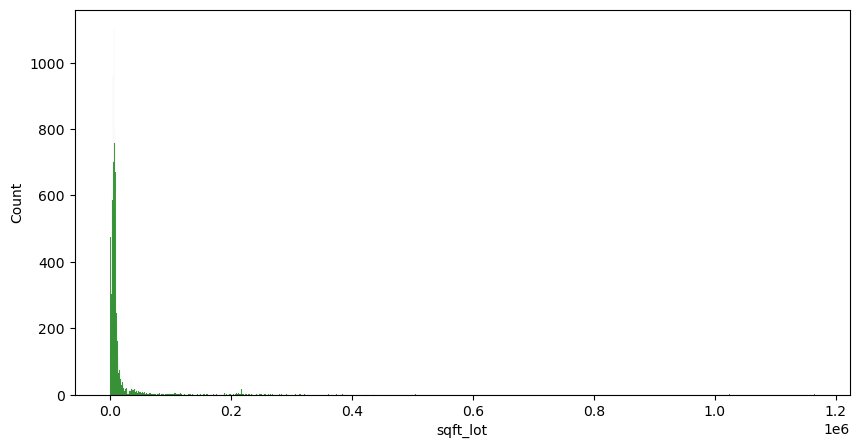

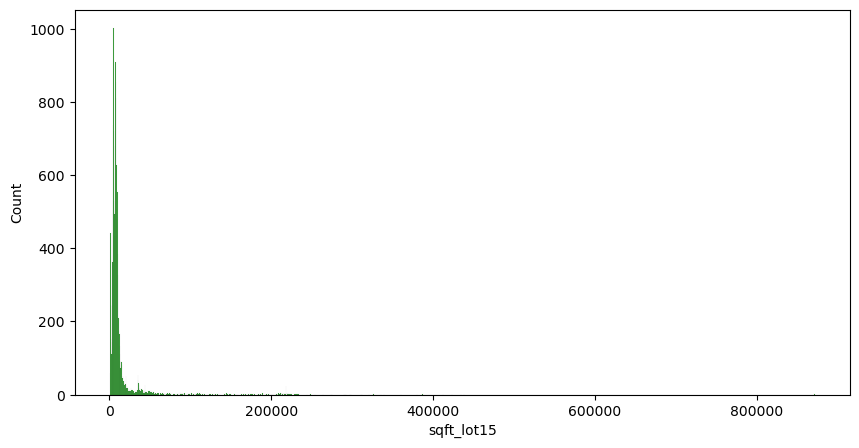

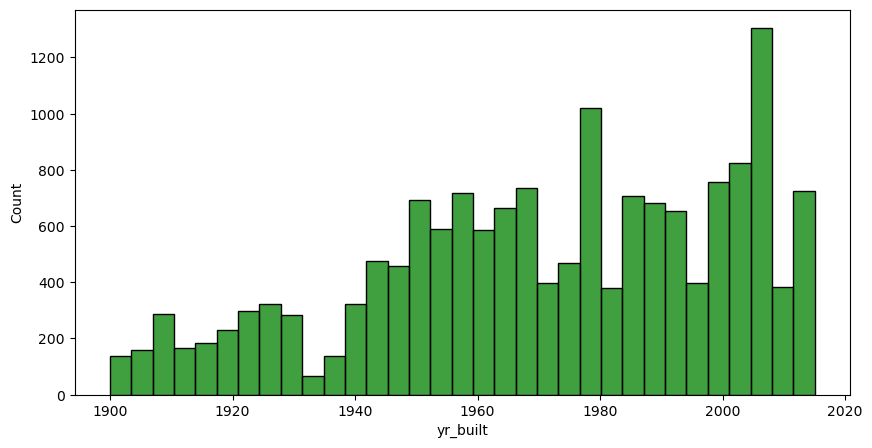

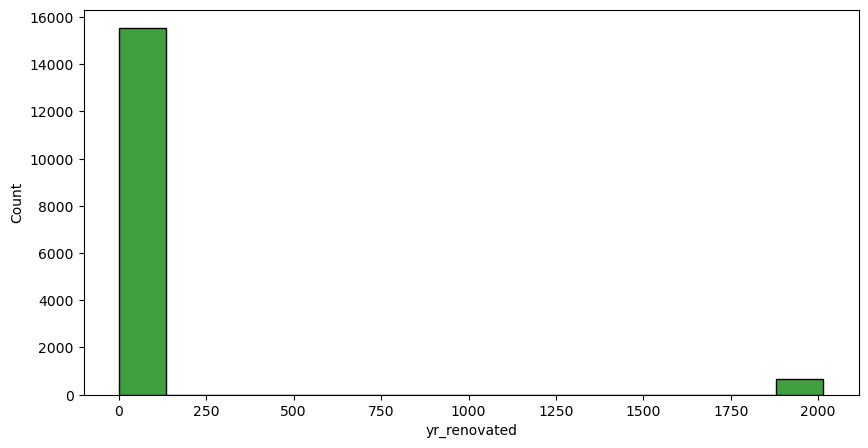

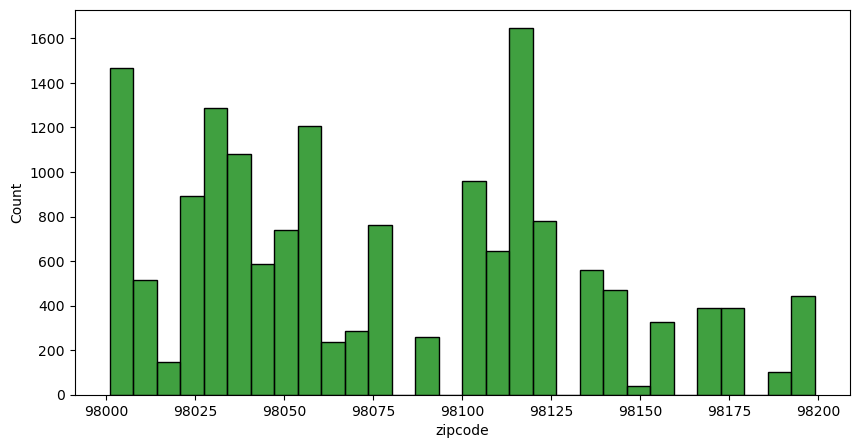

In [17]:
numerical_cols = train_data.columns.difference(cat_cols)

for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=train_data, x=col, color="green")
    plt.show()

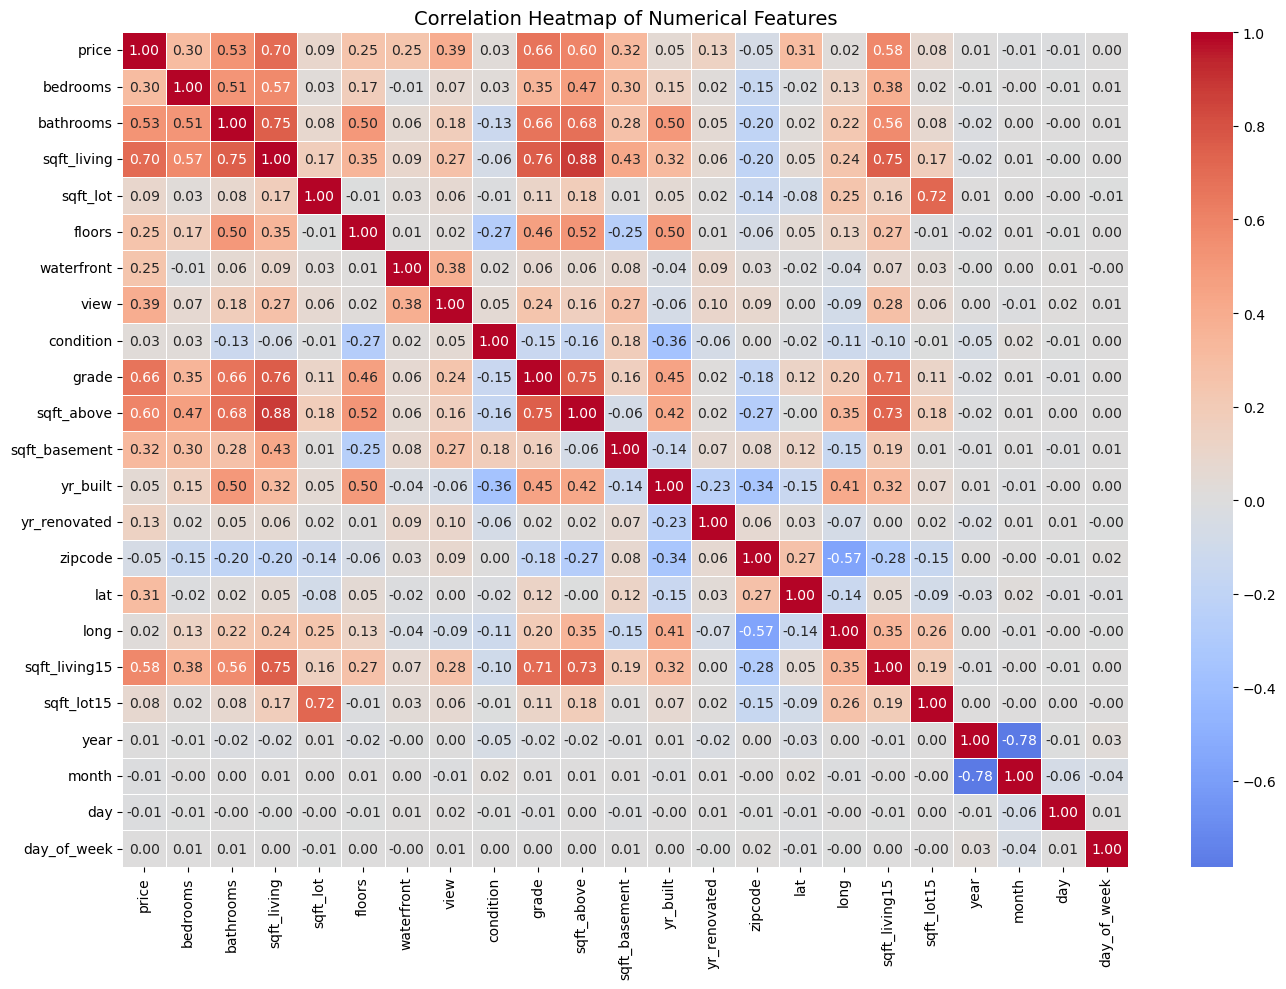

In [18]:
corr = train_data.corr()
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

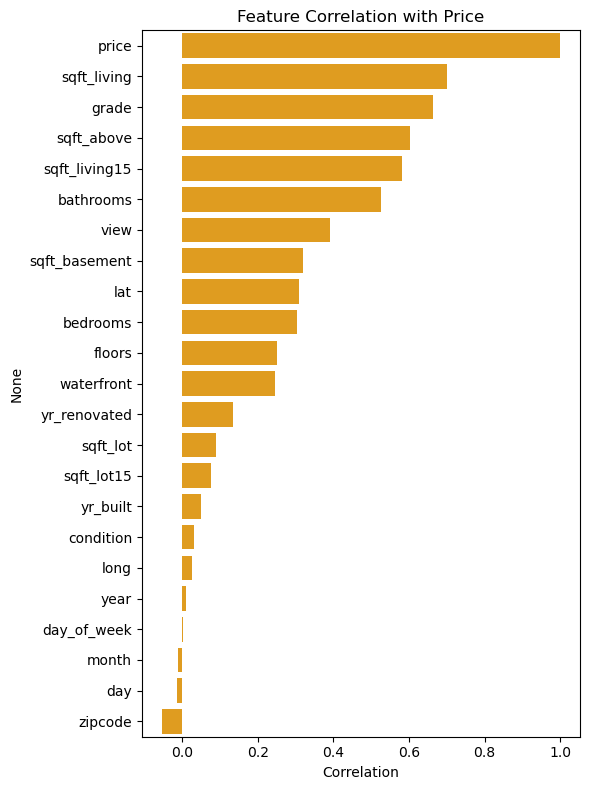

In [19]:
price_corr = corr["price"].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(x=price_corr.values, y=price_corr.index, color="orange")
plt.title("Feature Correlation with Price")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


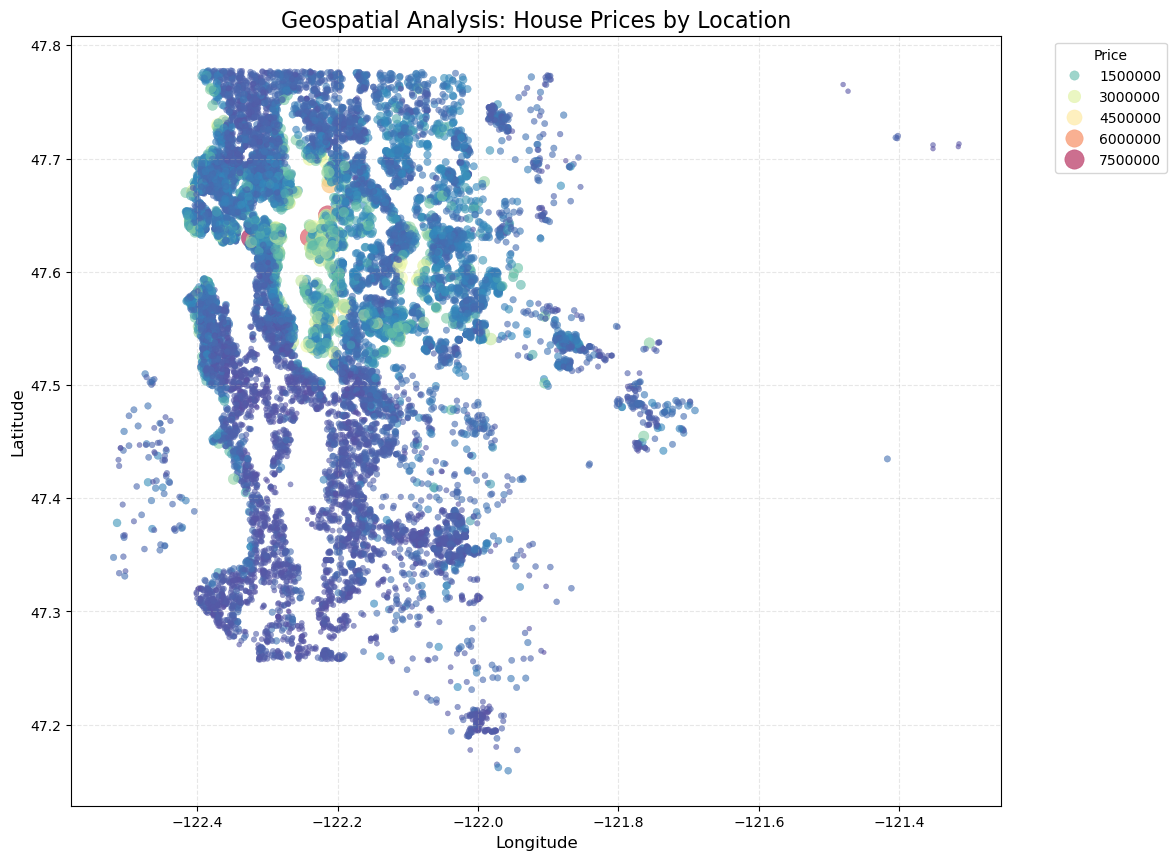

In [20]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=train_data, 
    x='long', 
    y='lat', 
    hue='price', 
    palette='Spectral_r', # Spectral Reverse: Red is hot (expensive)
    size='price',         # Larger dots for expensive houses
    sizes=(10, 200),      # Range of dot sizes
    alpha=0.6,
    edgecolor=None
)

plt.title('Geospatial Analysis: House Prices by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [21]:
X=train_data.drop(columns=["price"])
y=train_data.price

Splitting the training data for train and validation

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, random_state=7)

In [26]:
sclr = MinMaxScaler().set_output(transform="pandas")
x_train_scaled = sclr.fit_transform(x_train)
x_valid_scaled = sclr.transform(x_valid)
test_data_scaled = sclr.transform(test_data)

creating separate variable for scaled data to use in ann, knn etc and use normal in tree models

### 1] Decision Tree

In [23]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=20)
dt.fit(x_train,y_train)
y_prd = dt.predict(x_valid)

In [24]:
dt_rmse = root_mean_squared_error(y_valid, y_prd)
dt_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("RMSE: ", dt_rmse)
print("R2 score: ", dt_r2)

RMSE:  162752.4031661142
R2 score:  0.781609150513637


### 2] KNN

In [27]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_scaled,y_train)
y_prd = knn.predict(x_valid_scaled)


In [28]:
knn_rmse = root_mean_squared_error(y_valid, y_prd)
knn_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("KNN")
print("RMSE: ", knn_rmse)
print("R2 score: ", knn_r2)

KNN
RMSE:  202769.2510526196
R2 score:  0.6610124003636204


### 3] Random Forest 

In [29]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_prd = rf.predict(x_valid)

In [30]:
rf_rmse = root_mean_squared_error(y_valid, y_prd)
rf_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("Random forest")
print("RMSE: ", rf_rmse)
print("R2 score: ", rf_r2)

Random forest
RMSE:  121833.02220610071
R2 score:  0.8776202243638275


### 4] XGBoost

In [33]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.02, max_depth=6, device='cuda',n_jobs=-1)
xgb.fit(x_train, y_train)
y_prd = xgb.predict(x_valid)

remove device="cuda" if your device doesnt have gpu

In [34]:
from sklearn.metrics import root_mean_squared_error, r2_score
xgb_rmse = root_mean_squared_error(y_valid, y_prd)
xgb_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("XGBoost")
print("RMSE: ", xgb_rmse)
print("R2 score: ", xgb_r2)

XGBoost
RMSE:  109927.2734375
R2 score:  0.9003698825836182


### 5] ANN

In [35]:
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

In [39]:


ann1 = Sequential([
    Dense(256, activation="relu", input_shape=(22,)),
    Dropout(0.3),

    Dense(128, activation="relu"),
    Dropout(0.25),

    Dense(64, activation="relu"),
    Dropout(0.15),

    Dense(1, activation="linear")
])

ann1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse"]
)


c:\Users\awate\.conda\envs\ml_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
epochs = 300
batch_size = 64
callbacks = [
    EarlyStopping(patience=25, restore_best_weights=True),
    ReduceLROnPlateau(patience=12, factor=0.5)
]

In [41]:
ann1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 47,105 (184.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
ann1.fit(x_train_scaled,y_train_log, epochs=epochs, callbacks=callbacks,batch_size=batch_size, validation_data=(x_valid_scaled, y_valid_log), verbose=1)

Epoch 1/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15.9533 - mse: 15.9533 - val_loss: 0.6283 - val_mse: 0.6283 - learning_rate: 0.0010
Epoch 2/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0743 - mse: 3.0743 - val_loss: 0.2800 - val_mse: 0.2800 - learning_rate: 0.0010
Epoch 3/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4814 - mse: 2.4814 - val_loss: 0.2031 - val_mse: 0.2031 - learning_rate: 0.0010
Epoch 4/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1686 - mse: 2.1686 - val_loss: 0.3187 - val_mse: 0.3187 - learning_rate: 0.0010
Epoch 5/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0175 - mse: 2.0175 - val_loss: 0.2402 - val_mse: 0.2402 - learning_rate: 0.0010
Epoch 6/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9458 - mse: 1.9458 - val_loss: 0.1283 - val_mse: 0.1283 - learning_rate: 0.0010
Epoch 7/300
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9187 - mse: 1.9187 - val_loss: 0.1253 - val_mse: 0.1253 - learning_rate: 0.00

In [44]:
y_pred_log = ann1.predict(x_valid_scaled).ravel()
y_prd = np.expm1(y_pred_log)
ann_rmse = root_mean_squared_error(y_valid, y_prd)
ann_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("ANN")
print("RMSE: ", ann_rmse)
print("R2 score: ", ann_r2)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN
RMSE:  136560.921875
R2 score:  0.8462438583374023


Lets try a simplified ann

In [47]:
ann2 = Sequential()
ann2.add(Dense(64,input_dim=22,activation="relu"))
ann2.add(Dropout(0.2))
ann2.add(BatchNormalization())
ann2.add(Dense(128,activation="relu"))
ann2.add(Dropout(0.2))
ann2.add(BatchNormalization())
ann2.add(Dense(128,activation="relu"))
ann2.add(Dense(1,activation="linear"))

c:\Users\awate\.conda\envs\ml_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
ann2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,201 (106.25 KB)

 Trainable params: 26,817 (104.75 KB)

 Non-trainable params: 384 (1.50 KB)

In [53]:
ann2.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])

In [56]:
ann2.fit(
    x_train_scaled,
    y_train_log,
    validation_data=(x_valid_scaled, y_valid_log),
    epochs=200,
    batch_size=64,
    #callbacks=callbacks,
    verbose=1
)


Epoch 1/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8239 - mse: 0.8239 - val_loss: 0.3754 - val_mse: 0.3754
Epoch 2/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6145 - mse: 0.6145 - val_loss: 0.2300 - val_mse: 0.2300
Epoch 3/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5074 - mse: 0.5074 - val_loss: 0.2464 - val_mse: 0.2464
Epoch 4/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4704 - mse: 0.4704 - val_loss: 0.1627 - val_mse: 0.1627
Epoch 5/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4148 - mse: 0.4148 - val_loss: 0.1682 - val_mse: 0.1682
Epoch 6/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4251 - mse: 0.4251 - val_loss: 0.1348 - val_mse: 0.1348
Epoch 7/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3928 - mse: 0.3928 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 8/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3773 - mse: 0.3773 - val_loss: 0.1686 - val_mse: 0.1686
Epoch 9/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [57]:
y_pred_log = ann2.predict(x_valid_scaled).ravel()
y_prd = np.expm1(y_pred_log)
ann2_rmse = root_mean_squared_error(y_valid, y_prd)
ann2_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("ANN")
print("RMSE: ", ann2_rmse)
print("R2 score: ", ann2_r2)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN
RMSE:  189090.25
R2 score:  0.7052065134048462


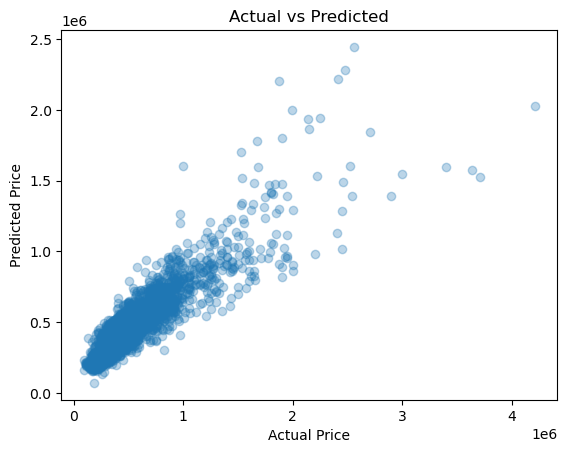

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_valid, y_prd, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

           Model           RMSE  R2 Score
0        XGBoost  109927.273438  0.900370
1  Random Forest  121833.022206  0.877620
2           ANN1  136560.921875  0.846244
3  Decision Tree  162752.403166  0.781609
4           ANN2  189090.250000  0.705207
5            KNN  202769.251053  0.661012


C:\Users\awate\AppData\Local\Temp\ipykernel_36688\944539530.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R2 Score', palette='viridis')


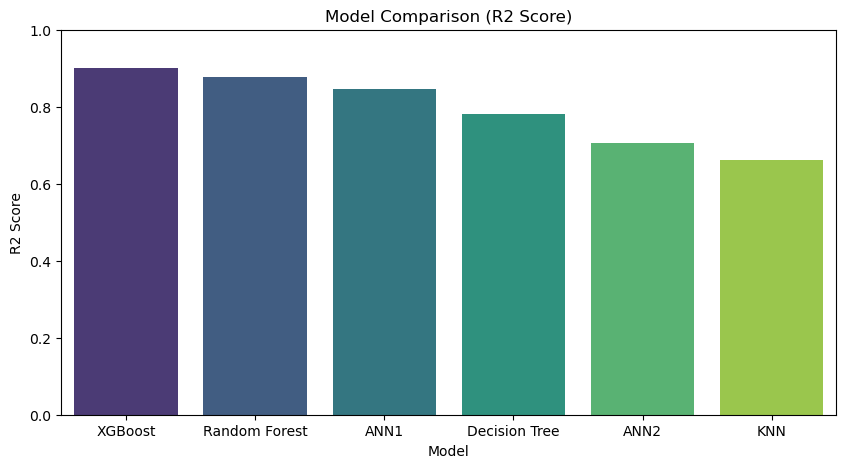

In [61]:
results_data = {
    'Model': ['ANN1','ANN2','KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [ann_rmse, ann2_rmse, knn_rmse, dt_rmse, rf_rmse, xgb_rmse],
    'R2 Score': [ann_r2, ann2_r2, knn_r2, dt_r2, rf_r2, xgb_r2]
}

results_df = pd.DataFrame(results_data)

results_df = results_df.sort_values(by='RMSE', ascending=True)

results_df = results_df.reset_index(drop=True)

print(results_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='R2 Score', palette='viridis')
plt.title("Model Comparison (R2 Score)")
plt.ylim(0, 1)
plt.show()